### Importing libraries

In [1]:
print("import libraries")
print("...")
#to disable notebook warnings
import warnings
warnings.filterwarnings('ignore')

# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# train test split
from sklearn.model_selection import train_test_split

# ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

print("...")
print("Done")
print("Libraries imported")

import libraries
...
...
Done
Libraries imported


In [2]:
## To set display settings
#pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)

### Loading data

In [3]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [4]:
train_data = read_data("./train.csv")

In [5]:
test_data = read_data("./test.csv")

In [6]:
## dropping columns

def drop_columns(data, columns):
    data = data.drop(columns=columns,axis=1,inplace=True)
    return data

## dropping id column
drop_columns(train_data,'id')
drop_columns(test_data,'id')

### Analyzing train data

In [7]:
def analyze_data(data):
    
    print("DataFrame Info:")
    print("=================================")
    display(data.info())
    print("\n")
    
    print("DataFrame Values:")
    print("=================================")
    display(data.head())
    print("\n")
    
    print("DataFrame Desscription")
    print("=================================")
    display(data.describe())
    print("\n")
    
    print("Number of null values")
    print("=================================")
    display(data.isnull().sum())
    print("\n")
    
    print("Number of duplicated values")
    print("==================================")
    display(data.duplicated().sum())
    print("\n")
    
    print("Number of unique values")
    print("==================================")
    display(data.nunique())
    print("\n")
    
    print("Dataframe Shape")
    print("===================================")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    

In [8]:
analyze_data(train_data)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


None



DataFrame Values:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850




DataFrame Desscription


,model_year,milage,price
count,54273.000000,54273.000000,5.427300e+04
mean,2015.091979,72746.175667,3.921844e+04
std,5.588909,50469.490448,7.282634e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,32268.000000,1.550000e+04
50%,2016.000000,66107.000000,2.800000e+04
75%,2019.000000,102000.000000,4.500000e+04
max,2024.000000,405000.000000,2.954083e+06




Number of null values


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64



Number of duplicated values


0



Number of unique values


brand             53
model           1827
model_year        34
milage          3212
fuel_type          7
engine          1061
transmission      46
ext_col          260
int_col          124
accident           2
clean_title        1
price           1481
dtype: int64



Dataframe Shape
Rows: 54273, Columns: 12


In [9]:
##dropping columns brand and model

drop_columns(train_data,['brand','model'])
drop_columns(test_data,['brand','model'])

In [10]:
## fuel_type

print("Value counts for fuel type \n\n", train_data['fuel_type'].value_counts())

print("------")
print("Number of rows in engine column with '-' are", len(train_data.loc[train_data['engine']=="–"]))

print("-----")
print("Rows with '-' as fuel type and not '-' as engine \n\n")
train_data.loc[(train_data['fuel_type']=='–')&(train_data['engine']!='–')]

Value counts for fuel type 

 Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: fuel_type, dtype: int64
------
Number of rows in engine column with '-' are 335
-----
Rows with '-' as fuel type and not '-' as engine 




,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
29532,2019,4700,–,375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,65000
33224,2013,2958,–,6.8L V12 48V GDI DOHC,8-Speed Automatic,Yellow,–,None reported,Yes,488880
35862,2011,188000,–,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,6500


In [11]:
print("Rows with 'not supported' as fuel type")
train_data.loc[(train_data['fuel_type']=='not supported')]

Rows with 'not supported' as fuel type


,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1069,2016,40000,not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,14000
9621,2023,29553,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Gray,None reported,Yes,9995
11441,2018,40000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Gray,None reported,Yes,7500
21771,2017,92000,not supported,390.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,20900


1. There are 3 rows with engine information. It seems fuel type is Gasoline from engine description. We can replace "-" by Gasoline for respective rows.

2. There is no corresponding information in engine column for all other rows with '-' in fuel_type column. So we can drop it.

3. We can see that "not supported" fuel_type. There are fuel types mentioned in engine column. We can replace the same.

In [12]:
def feature_engg_1(data):
    #Age of car using model year
    data['age'] = 2024 - data['model_year']
    #Dropping model_year column
    data.drop(columns='model_year',axis=1,inplace=True)
    
    #replacing values in fuel_type column
    data['fuel_type'].loc[(data['fuel_type']=='–')&(data['engine']!='–')] = 'Gasoline'
    data['fuel_type'].loc[(data['fuel_type']=='not supported')&(data['engine'].str.contains('Hydrogen'))] = 'Hydrogen'
    data['fuel_type'].loc[(data['fuel_type']=='not supported')&(data['engine'].str.contains('Gasoline'))] = 'Gasoline'
    
    #replacing values with '-' as fuel_type
    data['fuel_type'].replace('–','Gasoline')
    print("Number of rows with '–' as fuel type", len(data.loc[data['fuel_type']=='–']))
    
    #one hot encoding of fuel_type column
    data = pd.get_dummies(data, columns=['fuel_type'])
    pd.DataFrame(data)
    return data

In [13]:
train_data = feature_engg_1(train_data)
test_data = feature_engg_1(test_data)

Number of rows with '–' as fuel type 291
Number of rows with '–' as fuel type 195


In [14]:
def feature_engg_2(data):
    split_engine = data['engine'].str.split(" ",expand=True)

    split_engine.loc[split_engine[0].str.contains('HP'),'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'),0].str.replace('HP',"").astype(float)

    split_engine.loc[(split_engine[0].str.contains('HP'))&(split_engine[1].str.contains('L')),'litres'] = split_engine.loc[(split_engine[0].str.contains('HP'))&(split_engine[1].str.contains('L')),1].str.replace('L',"").astype(float)

    split_engine.loc[(split_engine[0].str.contains('HP'))&(split_engine[3]=='Cylinder'),'cylinders'] = split_engine.loc[(split_engine[0].str.contains('HP'))&(split_engine[3]=='Cylinder'),2].str.replace('V',"").astype(float)

    split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('L')),'horsepower'] = pd.to_numeric(split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('L')),0].str.replace('L',""),errors='coerce')

    split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('L')),'litres'] = pd.to_numeric(split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('L')),0].str.replace('L',""),errors='coerce')

    split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()),'cylinders'] = abs(pd.to_numeric(split_engine.loc[~(split_engine[0].str.contains('HP'))&(split_engine[0].str.contains('V'))][0].str.replace('V',''),errors='coerce'))

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

    split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

    split_engine['cylinders'].fillna(split_engine['cylinders'].median(), inplace=True)

    split_engine['horsepower'].fillna(split_engine['horsepower'].median(), inplace=True)

    split_engine['litres'].fillna(split_engine['horsepower'].median(),inplace=True)

    data = pd.concat([data, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)
    
    return data

In [15]:
train_data = feature_engg_2(train_data)
test_data = feature_engg_2(test_data)

In [16]:
print(f'{train_data.shape} and {test_data.shape}')

(54273, 19) and (36183, 18)


In [17]:
## dropping engine, ext_col, int_col column

drop_columns(train_data,columns=['engine','ext_col','int_col'])
drop_columns(test_data,columns=['engine','ext_col','int_col'])

In [18]:
train_data.head()

,milage,transmission,accident,clean_title,price,age,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_Plug-In Hybrid,fuel_type_–,horsepower,litres,cylinders
0,74349,10-Speed A/T,None reported,Yes,11000,6,0,0,1,0,0,0,0,375.0,3.5,6.0
1,80000,6-Speed M/T,None reported,Yes,8250,17,0,0,1,0,0,0,0,300.0,3.0,6.0
2,91491,6-Speed A/T,None reported,Yes,15000,15,0,0,1,0,0,0,0,300.0,4.2,8.0
3,2437,Transmission w/Dual Shift Mode,None reported,Yes,63500,2,0,0,0,1,0,0,0,335.0,3.0,6.0
4,111000,A/T,None reported,Yes,7850,23,0,0,1,0,0,0,0,200.0,3.8,6.0


In [19]:
def feature_engg_3(data):
    transmission_split = data['transmission'].str.split("-Speed",expand=True)
    
    transmission_split['speed'] = transmission_split[0].apply(pd.to_numeric, errors='coerce')
    transmission_split['speed'].fillna(transmission_split['speed'].median(),inplace=True)


    transmission_split.loc[transmission_split[0].str.contains('A/T'),'transmission_type'] = 'automatic'
    transmission_split.loc[transmission_split[0].str.contains('Automatic'),'transmission_type'] = 'automatic'
    transmission_split.loc[transmission_split[0].str.contains('Transmission w/Dual Shift Mode'),'transmission_type'] = 'Transmission w/Dual Shift Mode'
    transmission_split.loc[transmission_split[0].str.contains('M/T'),'transmission_type'] = 'manual'
    transmission_split.loc[transmission_split[1].str.contains('M/T',na=False),'transmission_type'] = 'manual'
    transmission_split.loc[transmission_split[1].str.contains('A/T',na=False),'transmission_type'] = 'automatic'
    transmission_split.loc[transmission_split[1].str.contains('Automatic',na=False),'transmission_type'] = 'automatic'
    transmission_split['transmission_type'].fillna('automatic',inplace=True)
    
    data = pd.concat([data, transmission_split[['speed','transmission_type']]],axis=1)
    data = pd.get_dummies(data,columns=['transmission_type'])
    
    return data

In [20]:
train_data = feature_engg_3(train_data)
test_data = feature_engg_3(test_data)

In [21]:
drop_columns(train_data,'transmission')
drop_columns(test_data,'transmission')

In [22]:
print(f'{train_data.shape} and {test_data.shape}')

(54273, 19) and (36183, 18)


In [23]:
train_data.columns

Index(['milage', 'accident', 'clean_title', 'price', 'age', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Hydrogen', 'fuel_type_Plug-In Hybrid', 'fuel_type_–',
       'horsepower', 'litres', 'cylinders', 'speed',
       'transmission_type_Transmission w/Dual Shift Mode',
       'transmission_type_automatic', 'transmission_type_manual'],
      dtype='object')

In [24]:
test_data.columns

Index(['milage', 'accident', 'clean_title', 'age', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Hydrogen', 'fuel_type_Plug-In Hybrid', 'fuel_type_–',
       'horsepower', 'litres', 'cylinders', 'speed',
       'transmission_type_Transmission w/Dual Shift Mode',
       'transmission_type_automatic', 'transmission_type_manual'],
      dtype='object')

In [25]:
train_data['clean_title'].value_counts()

Yes    54273
Name: clean_title, dtype: int64

In [26]:
def feature_engg_4(data):
    data.loc[data['accident'].str.contains('None',na=False),'accident'] = 0
    data.loc[data['accident'].str.contains('1',na=False),'accident'] = 1
    data['accident'] = data['accident'].astype(float)
    data = pd.get_dummies(data,columns=['clean_title'])
    
    return data

In [27]:
train_data=feature_engg_4(train_data)
test_data = feature_engg_4(test_data)

In [28]:
train_data.head()

,milage,accident,price,age,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_Plug-In Hybrid,fuel_type_–,horsepower,litres,cylinders,speed,transmission_type_Transmission w/Dual Shift Mode,transmission_type_automatic,transmission_type_manual,clean_title_Yes
0,74349,0.0,11000,6,0,0,1,0,0,0,0,375.0,3.5,6.0,10.0,0,1,0,1
1,80000,0.0,8250,17,0,0,1,0,0,0,0,300.0,3.0,6.0,6.0,0,0,1,1
2,91491,0.0,15000,15,0,0,1,0,0,0,0,300.0,4.2,8.0,6.0,0,1,0,1
3,2437,0.0,63500,2,0,0,0,1,0,0,0,335.0,3.0,6.0,7.0,1,0,0,1
4,111000,0.0,7850,23,0,0,1,0,0,0,0,200.0,3.8,6.0,7.0,0,1,0,1


<AxesSubplot:>

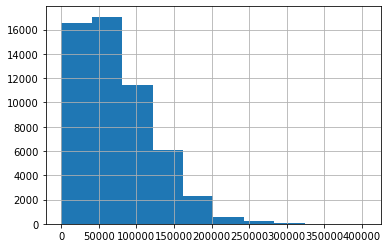

In [29]:
train_data['milage'].hist()

### Model Building

In [30]:
## dependent and independent

y = train_data['price']
X = train_data[train_data.columns.drop("price")]

print(f'shape of X is {X.shape} and shape of Y is {y.shape}')

shape of X is (54273, 18) and shape of Y is (54273,)


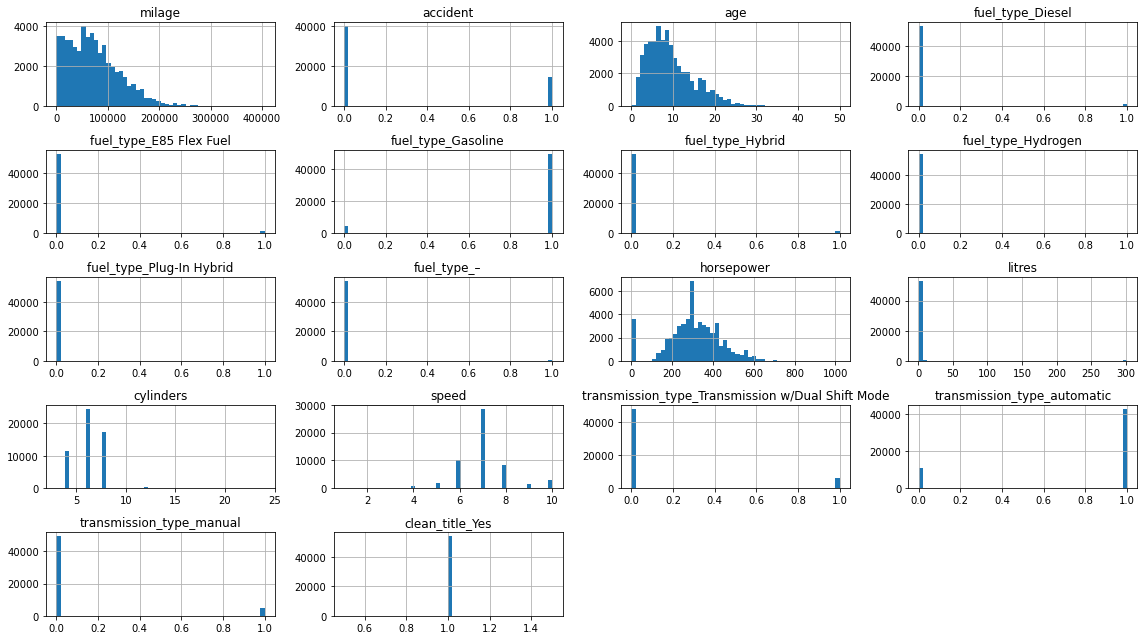

In [31]:
## Plotting histogram to get idea of attributes distribution

%matplotlib inline
X.hist(figsize=(16,9),bins=50)
plt.tight_layout()
plt.show()

In [32]:
columns = X.columns

In [33]:
obj = StandardScaler()
X = obj.fit_transform(X)
X = pd.DataFrame(X,columns=columns)
X.shape

(54273, 18)

In [34]:
#train-validation split of training data

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=100)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(43418, 18) (10855, 18) (43418,) (10855,)


In [35]:
# fitting of linear regression

model = DecisionTreeRegressor()

model.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
model.score(X_train,y_train)

0.9725341579413517

In [37]:
y_pred = model.predict(X_valid)

np.sqrt(mean_squared_error(y_valid,y_pred))

109144.29467644484

In [38]:
y_pred

array([ 9500.        , 22495.        , 19950.        , ...,
       78350.        , 34995.        , 15016.66666667])

In [39]:
obj = StandardScaler()
test_data = obj.fit_transform(test_data)
test_data = pd.DataFrame(test_data,columns=columns)
test_data.shape

(36183, 18)

In [40]:
y_preds = model.predict(test_data)
y_preds = pd.DataFrame(y_preds,columns=['price'])
y_preds

,price
0,29500.0
1,11995.0
2,29000.0
3,42500.0
4,33500.0
...,...
36178,53000.0
36179,4000.0
36180,6900.0
36181,70250.0


In [41]:
test_data.head()

,milage,accident,age,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_Plug-In Hybrid,fuel_type_–,horsepower,litres,cylinders,speed,transmission_type_Transmission w/Dual Shift Mode,transmission_type_automatic,transmission_type_manual,clean_title_Yes
0,0.010268,-0.600304,0.190357,-0.137459,-0.170145,0.308642,-0.178065,-0.009106,-0.064087,-0.07361,-0.065084,-0.113470,-0.175840,-0.038034,-0.365594,0.514101,-0.316684,0.0
1,1.095406,-0.600304,0.011442,-0.137459,-0.170145,0.308642,-0.178065,-0.009106,-0.064087,-0.07361,-0.268944,-0.113470,-0.175840,0.857334,-0.365594,0.514101,-0.316684,0.0
2,-0.404152,-0.600304,0.011442,-0.137459,-0.170145,0.308642,-0.178065,-0.009106,-0.064087,-0.07361,-0.525657,-0.160911,-1.457937,-0.038034,-0.365594,0.514101,-0.316684,0.0
3,-0.847479,1.665821,-0.525302,-0.137459,-0.170145,0.308642,-0.178065,-0.009106,-0.064087,-0.07361,1.565795,-0.066028,1.106258,-0.038034,2.735273,-1.945143,-0.316684,0.0
4,0.345479,1.665821,-0.883131,-0.137459,-0.170145,0.308642,-0.178065,-0.009106,-0.064087,-0.07361,0.184078,-0.129283,-0.175840,0.857334,-0.365594,0.514101,-0.316684,0.0


In [42]:
sample_submission = read_data('./sample_submission.csv')

In [43]:
sample_submission.shape

(36183, 2)

In [44]:
sample_submission['price'] = y_preds['price']

In [45]:
sample_submission.head()

,id,price
0,54273,29500.0
1,54274,11995.0
2,54275,29000.0
3,54276,42500.0
4,54277,33500.0


In [46]:
sample_submission.to_csv('output.csv',index=False)

In [47]:
sample_submission.isna().sum()

id       0
price    0
dtype: int64

In [48]:
model_1 = RandomForestRegressor()

model_1.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
model_1.score(X_train,y_train)

0.8428142000269735

In [50]:
y_pred = model_1.predict(X_valid)

np.sqrt(mean_squared_error(y_valid,y_pred))

75738.37236045489

In [51]:
y_preds_1 = model_1.predict(test_data)
y_preds_1 = pd.DataFrame(y_preds_1,columns=['price'])

In [52]:
sample_submission['price'] = y_preds_1['price']

In [53]:
sample_submission.to_csv('out_1.csv',index=False)

In [54]:
param_grid = [{'n_estimators':[3,10,30,40,50], 'max_features':[2,4,6]},
             {'bootstrap':[False],'n_estimators':[3,10,30,40],'max_features':[2,3,4,6]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30, 40]}],
             scoring='neg_mean_squared_error')

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=40)

In [56]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 40}

In [57]:
results = grid_search.cv_results_

In [58]:
for mean_score, params in zip(results['mean_test_score'],results['params']):
    print(np.sqrt(-mean_score),params)

79722.07629285361 {'max_features': 2, 'n_estimators': 3}
74505.18690776615 {'max_features': 2, 'n_estimators': 10}
73107.05563035971 {'max_features': 2, 'n_estimators': 30}
73261.27377929547 {'max_features': 2, 'n_estimators': 40}
72801.54612780415 {'max_features': 2, 'n_estimators': 50}
80398.54649755554 {'max_features': 4, 'n_estimators': 3}
74221.2123131791 {'max_features': 4, 'n_estimators': 10}
72822.69421539769 {'max_features': 4, 'n_estimators': 30}
72196.76700625948 {'max_features': 4, 'n_estimators': 40}
72559.89078326205 {'max_features': 4, 'n_estimators': 50}
83118.94860757666 {'max_features': 6, 'n_estimators': 3}
75033.48409067105 {'max_features': 6, 'n_estimators': 10}
73215.60609483859 {'max_features': 6, 'n_estimators': 30}
72568.4435472795 {'max_features': 6, 'n_estimators': 40}
72353.62968761976 {'max_features': 6, 'n_estimators': 50}
83762.91955234933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
77073.4733728254 {'bootstrap': False, 'max_features': 2, '

In [59]:
final_model = grid_search.best_estimator_

y_pred_final = final_model.predict(X_valid)
np.sqrt(mean_squared_error(y_valid,y_pred))

75738.37236045489

In [60]:
y_preds_final = final_model.predict(test_data)
y_preds_final = pd.DataFrame(y_preds_final,columns=['price'])

In [61]:
sample_submission['price'] = y_preds_final['price']
sample_submission.to_csv('final_output.csv',index=False)

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=40)

In [63]:
param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 1/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-75719.672 total time=   0.3s
[CV 2/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-71318.819 total time=   0.2s
[CV 3/3; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 3/3; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-65304.433 total time=   0.2s
[CV 1/3; 2/64] START learning_rate=0.01, max_depth=3, n_estimators=500..........
[CV 1/3; 2/64] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=-74309.322 total time=   1.0s
[CV 2/3; 2/64] START learning_rate=0.01, max_depth=3, n_estimators=500..........
[CV 2/3; 2/64] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=-70512.642 total time=   1.0

[CV 2/3; 15/64] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=-84618.076 total time=   8.9s
[CV 3/3; 15/64] START learning_rate=0.01, max_depth=10, n_estimators=1000.......
[CV 3/3; 15/64] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=-79765.203 total time=   9.0s
[CV 1/3; 16/64] START learning_rate=0.01, max_depth=10, n_estimators=2000.......
[CV 1/3; 16/64] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=-82275.263 total time=  20.4s
[CV 2/3; 16/64] START learning_rate=0.01, max_depth=10, n_estimators=2000.......
[CV 2/3; 16/64] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=-87739.878 total time=  18.7s
[CV 3/3; 16/64] START learning_rate=0.01, max_depth=10, n_estimators=2000.......
[CV 3/3; 16/64] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=-81399.261 total time=  18.5s
[CV 1/3; 17/64] START learning_rate=0.05, max_depth=3, n_estimators=100.........
[CV 1/3; 17/64] END learning_rate=0.05, max_d

[CV 1/3; 30/64] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=-82502.875 total time=   5.1s
[CV 2/3; 30/64] START learning_rate=0.05, max_depth=10, n_estimators=500........
[CV 2/3; 30/64] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=-86991.597 total time=   4.8s
[CV 3/3; 30/64] START learning_rate=0.05, max_depth=10, n_estimators=500........
[CV 3/3; 30/64] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=-81908.934 total time=   4.7s
[CV 1/3; 31/64] START learning_rate=0.05, max_depth=10, n_estimators=1000.......
[CV 1/3; 31/64] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=-83165.909 total time=  10.1s
[CV 2/3; 31/64] START learning_rate=0.05, max_depth=10, n_estimators=1000.......
[CV 2/3; 31/64] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=-88728.386 total time=   9.9s
[CV 3/3; 31/64] START learning_rate=0.05, max_depth=10, n_estimators=1000.......
[CV 3/3; 31/64] END learning_rate=0.05, max_dept

[CV 3/3; 44/64] END learning_rate=0.1, max_depth=8, n_estimators=2000;, score=-78711.076 total time=  12.5s
[CV 1/3; 45/64] START learning_rate=0.1, max_depth=10, n_estimators=100.........
[CV 1/3; 45/64] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=-81398.913 total time=   1.1s
[CV 2/3; 45/64] START learning_rate=0.1, max_depth=10, n_estimators=100.........
[CV 2/3; 45/64] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=-84514.672 total time=   1.0s
[CV 3/3; 45/64] START learning_rate=0.1, max_depth=10, n_estimators=100.........
[CV 3/3; 45/64] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=-79938.790 total time=   0.9s
[CV 1/3; 46/64] START learning_rate=0.1, max_depth=10, n_estimators=500.........
[CV 1/3; 46/64] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=-83429.467 total time=   5.1s
[CV 2/3; 46/64] START learning_rate=0.1, max_depth=10, n_estimators=500.........
[CV 2/3; 46/64] END learning_rate=0.1, max_depth=10, n_

[CV 2/3; 59/64] END learning_rate=0.15, max_depth=8, n_estimators=1000;, score=-92426.299 total time=   6.1s
[CV 3/3; 59/64] START learning_rate=0.15, max_depth=8, n_estimators=1000........
[CV 3/3; 59/64] END learning_rate=0.15, max_depth=8, n_estimators=1000;, score=-78766.137 total time=   6.1s
[CV 1/3; 60/64] START learning_rate=0.15, max_depth=8, n_estimators=2000........
[CV 1/3; 60/64] END learning_rate=0.15, max_depth=8, n_estimators=2000;, score=-84194.377 total time=  12.8s
[CV 2/3; 60/64] START learning_rate=0.15, max_depth=8, n_estimators=2000........
[CV 2/3; 60/64] END learning_rate=0.15, max_depth=8, n_estimators=2000;, score=-93117.734 total time=  12.7s
[CV 3/3; 60/64] START learning_rate=0.15, max_depth=8, n_estimators=2000........
[CV 3/3; 60/64] END learning_rate=0.15, max_depth=8, n_estimators=2000;, score=-79215.418 total time=  12.5s
[CV 1/3; 61/64] START learning_rate=0.15, max_depth=10, n_estimators=100........
[CV 1/3; 61/64] END learning_rate=0.15, max_depth=

In [65]:
final_model_xgb = grid_search_cv.best_estimator_

y_pred_final_xgb = final_model.predict(X_valid)
np.sqrt(mean_squared_error(y_valid,y_pred_final_xgb))

69062.38565791721

In [66]:
y_preds_final_xgb = final_model_xgb.predict(test_data)
y_preds_final_xgb = pd.DataFrame(y_preds_final_xgb,columns=['price'])

In [67]:
sample_submission['price'] = y_preds_final_xgb['price']
sample_submission.to_csv('final_output_xgb.csv',index=False)

In [69]:
param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10]}

grid_search_cv_RF=GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv_RF.fit(X_train,y_train)

best_model=grid_search_cv_RF.best_estimator_
print(grid_search_cv_RF.best_estimator_)
print(grid_search_cv_RF.best_score_)
print(grid_search_cv_RF.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START max_depth=3, n_estimators=100..............................
[CV 1/3; 1/16] END max_depth=3, n_estimators=100;, score=-75252.365 total time=   3.7s
[CV 2/3; 1/16] START max_depth=3, n_estimators=100..............................
[CV 2/3; 1/16] END max_depth=3, n_estimators=100;, score=-70840.397 total time=   3.6s
[CV 3/3; 1/16] START max_depth=3, n_estimators=100..............................
[CV 3/3; 1/16] END max_depth=3, n_estimators=100;, score=-64876.176 total time=   4.2s
[CV 1/3; 2/16] START max_depth=3, n_estimators=500..............................
[CV 1/3; 2/16] END max_depth=3, n_estimators=500;, score=-75144.143 total time=  16.5s
[CV 2/3; 2/16] START max_depth=3, n_estimators=500..............................
[CV 2/3; 2/16] END max_depth=3, n_estimators=500;, score=-70817.482 total time=  13.0s
[CV 3/3; 2/16] START max_depth=3, n_estimators=500..............................
[CV 3/3; 2/16] END

In [70]:
final_model_rf = grid_search_cv_RF.best_estimator_

y_pred_final_rf = final_model_rf.predict(X_valid)
np.sqrt(mean_squared_error(y_valid,y_pred_final_rf))

63274.829329466425

In [71]:
y_preds_final_rf = final_model_rf.predict(test_data)
y_preds_final_rf = pd.DataFrame(y_preds_final_rf,columns=['price'])

In [72]:
sample_submission['price'] = y_preds_final_rf['price']
sample_submission.to_csv('final_output_rf.csv',index=False)